In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\sathy\appdata\local\programs\python\python311\lib\site-packages (3.9.0)




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scipy joblib threadpoolctl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,18,male,16.0,0,no,northeast,1694.80
1,18,male,17.3,2,yes,northeast,12829.46
2,18,female,20.8,0,no,southeast,1607.51
3,18,male,21.5,0,no,northeast,1702.46
4,18,male,21.6,0,yes,northeast,13747.87


In [5]:
df['children'] = df['children'].astype('object')


In [6]:
#plt.figure(figsize = (12,8))
#sns.histplot(x= 'expenses',data = df,kde = True)

In [7]:
#df['expenses'] = np.sqrt(df['expenses'])


In [8]:
df.head(100)


,age,sex,bmi,children,smoker,region,expenses
0,18,male,16.0,0,no,northeast,1694.80
1,18,male,17.3,2,yes,northeast,12829.46
2,18,female,20.8,0,no,southeast,1607.51
3,18,male,21.5,0,no,northeast,1702.46
4,18,male,21.6,0,yes,northeast,13747.87
...,...,...,...,...,...,...,...
95,19,male,27.7,0,yes,southwest,16297.85
96,19,male,27.8,0,no,northwest,1635.73
97,19,female,27.9,0,yes,southwest,16884.92
98,19,female,27.9,3,no,northwest,18838.70


In [9]:
#plt.figure(figsize = (12,8))
#sns.histplot(x= 'expenses',data = df,kde = True)

In [10]:
#df['expenses'] = np.log(df['expenses'])


In [11]:
#plt.figure(figsize = (12,8))
#sns.histplot(x= 'expenses',data = df,kde = True)

In [12]:
cat_columns = df.select_dtypes(include = 'object').columns
cat_columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [13]:
df  = pd.get_dummies(df,cat_columns,drop_first = True)


C:\Users\sathy\AppData\Local\Temp\ipykernel_8692\3569672404.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df  = pd.get_dummies(df,cat_columns,drop_first = True)


In [14]:
df.columns

Index(['age', 'bmi', 'expenses', 'sex_male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [15]:
y = df['expenses']


In [16]:
X = df[['age', 'bmi', 'sex_male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=410)

In [18]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
predictions = lm.predict(X_test)
predictions

array([ 1.34213062e+04,  9.02428491e+03,  1.44413595e+04,  3.99278919e+03,
        1.23372952e+04,  3.97106058e+04,  3.57606553e+03,  6.07775282e+03,
        1.19883929e+04, -4.89858045e+02,  1.53681778e+04,  3.52133354e+03,
        1.61444651e+04,  1.14533542e+04,  7.15664623e+03,  3.19830288e+03,
        1.05835618e+04,  1.84293316e+04,  2.56113549e+04,  6.21990893e+03,
        4.37536457e+03,  1.44178598e+04,  1.06389016e+04,  1.09807691e+04,
        3.01742216e+04,  2.63967831e+03,  1.03446238e+04,  5.49791893e+03,
        1.32750086e+04, -3.06669551e+02,  1.50974585e+04,  6.60945264e+03,
        3.67945273e+03,  1.30963679e+04,  5.33306574e+03,  2.89928740e+03,
        1.22551937e+04,  2.68291328e+04,  1.47496093e+04,  6.84622080e+03,
        6.58613636e+03,  5.95127022e+03,  3.28401838e+03,  7.13604911e+03,
        1.57252560e+04,  1.16417001e+04, -1.49824853e+03,  9.31602495e+03,
        4.50836713e+03,  4.02407673e+03,  5.97415442e+03,  9.21570037e+03,
        1.41970684e+04,  

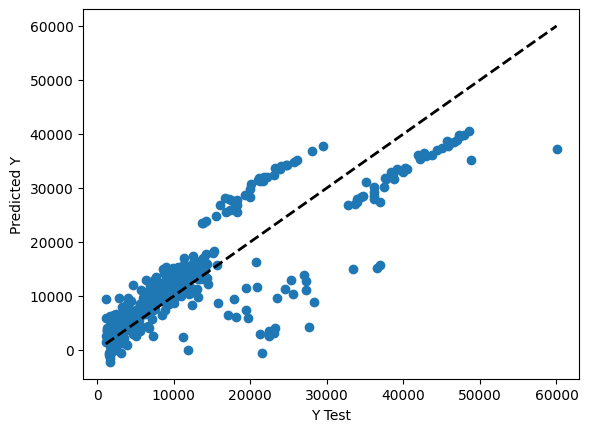

In [20]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4215.726336166608
MSE: 37267420.1821046
RMSE: 6104.704757980078


In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)*100

74.79294576853582

In [23]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print("Predicted and Actual Values:")
print(results_df)

Predicted and Actual Values:
        Actual     Predicted
1005   9877.61  13421.306184
842    9500.57   9024.284906
1007   9880.07  14441.359477
40     2207.70   3992.789189
969   10118.42  12337.295195
...        ...           ...
480    4562.84   5671.651069
930   23306.55  33626.424873
204    2156.75   2400.059974
863    8733.23  14211.651426
291    2523.17   3054.611823

[402 rows x 2 columns]


In [24]:
new_data = pd.DataFrame({
    'age': [29],
    'bmi': [31.1],
    'sex_male': [1],
    'children_1': [1],
    'children_2': [0],
    'children_3': [1],
    'children_4': [0],
    'children_5': [0],
    'smoker_yes': [0],
    #'region_northeast':[0],
    'region_northwest': [0],
    'region_southeast': [0],
    'region_southwest': [1]
})

# Predicting the expenses for the new data
predicted_expenses = lm.predict(new_data)
print(f"Predicted expenses: {predicted_expenses[0]}")

Predicted expenses: 6424.958578640477
